# 产地区分数据读取

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
H1,0.878661,0.861012,0.883963,0.840393,0.858726,0.809607,0.805233,0.761455,0.768536,0.766106,...,0.864688,0.888775,0.911705,0.943058,0.964780,0.978334,0.986548,0.993940,0.994547,0.998367
H1,0.893597,0.876496,0.897541,0.873638,0.870838,0.836191,0.822110,0.797176,0.800602,0.808478,...,0.889813,0.915417,0.919695,0.951209,0.968365,0.983617,0.984012,0.993012,0.993936,0.998084
H1,0.831121,0.798317,0.819850,0.792262,0.789821,0.749816,0.756048,0.697744,0.703812,0.708069,...,0.827293,0.861026,0.874113,0.930114,0.941131,0.960042,0.973008,0.983941,0.983254,0.997756
H1,0.808590,0.789762,0.800852,0.780599,0.766549,0.735763,0.740621,0.697549,0.702815,0.700304,...,0.834113,0.849099,0.865990,0.921068,0.939998,0.961308,0.965271,0.977486,0.979545,0.997465
H1,0.756085,0.729613,0.762144,0.733583,0.741302,0.705414,0.706990,0.665835,0.675118,0.676021,...,0.799743,0.835071,0.848101,0.878220,0.890233,0.923890,0.940794,0.954440,0.966966,0.986715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W14,0.675972,0.668657,0.681878,0.646360,0.641117,0.620692,0.617279,0.589178,0.595068,0.589167,...,0.739235,0.764995,0.773678,0.805125,0.834154,0.858598,0.875243,0.897420,0.903078,0.949320
W14,0.782282,0.785176,0.783928,0.755025,0.775005,0.738374,0.725169,0.703537,0.684294,0.675768,...,0.819892,0.843275,0.867493,0.911171,0.919256,0.956222,0.978461,0.987693,0.989226,0.994267
W14,0.802291,0.795179,0.793180,0.768723,0.786874,0.744974,0.746445,0.719645,0.692377,0.692896,...,0.818070,0.844074,0.867522,0.914667,0.933435,0.960434,0.981607,0.986979,0.994425,0.996951
W14,0.775438,0.775044,0.785219,0.746550,0.748850,0.711879,0.719631,0.685603,0.671111,0.675619,...,0.820713,0.860375,0.872603,0.896273,0.917324,0.954667,0.974417,0.976958,0.986647,0.995565


In [40]:
import pandas as pd 
import numpy as np
df = pd.read_csv(rf'H:\CHENPI0605\陈皮原始反射光谱数据_split.csv' , index_col = 0)

In [41]:

df_guagnxi = df[df.index.str.contains('W')]
df_xinhui = df[df.index.str.contains('H')]

wave = np.linspace(886, 1724, 512)
labels_guagnxi = df_guagnxi.index.values
labels_xinhui = df_xinhui.index.values

spectrum_guagnxi = df_guagnxi.values
spectrum_xinhui = df_xinhui.values

### 绘图查看数据情况

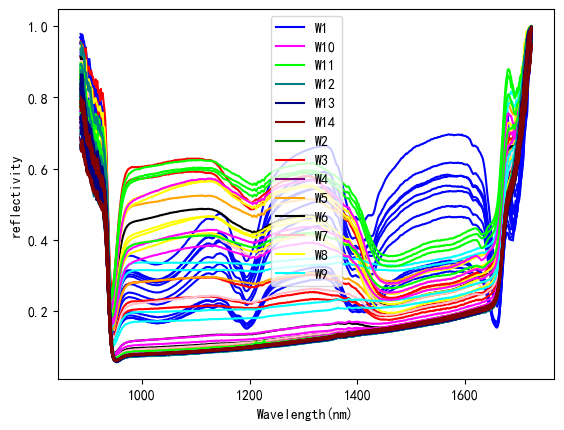

In [44]:
import importlib
import SpectrumAnalyse  # 导入模块

# 导入需要的函数
from SpectrumAnalyse import plot_duplicate_data, split_data
import matplotlib.pyplot as plt

category,  split_datas = split_data(labels_guagnxi , spectrum_guagnxi)
plot_duplicate_data(category,  split_datas , wave , type='all') 


In [33]:
category

[]

In [34]:
spectrum_xinhui

array([], shape=(0, 512), dtype=float64)

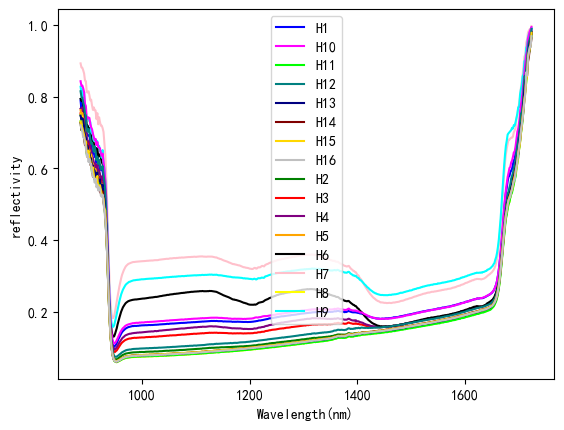

In [39]:
import importlib
import SpectrumAnalyse  # 导入模块

# 导入需要的函数
from SpectrumAnalyse import plot_duplicate_data, split_data
import matplotlib.pyplot as plt

category,  split_datas = split_data(labels_xinhui , spectrum_xinhui)
plot_duplicate_data(category,  split_datas , wave , type='mean') 

In [152]:
def snv(ori_specs):
    """标准正态化
    对多个光谱数据进行标准正态化校正，理想光谱采用的是平均光谱
    @param ori_specs: Numpy数组,原始光谱,形状为[n, spec]
    @return: 标准正态变化后的光谱
    """
    # Define v0.1.1-a new array and populate it with the corrected data
    snv_specs = np.zeros_like(ori_specs)
    for i in range(ori_specs.shape[0]):
        # Apply correction
        snv_specs[i, :] = (ori_specs[i, :] - np.mean(ori_specs[i, :])) / np.std(ori_specs[i, :])
    return snv_specs

reflectance_snv = snv(spectrum)

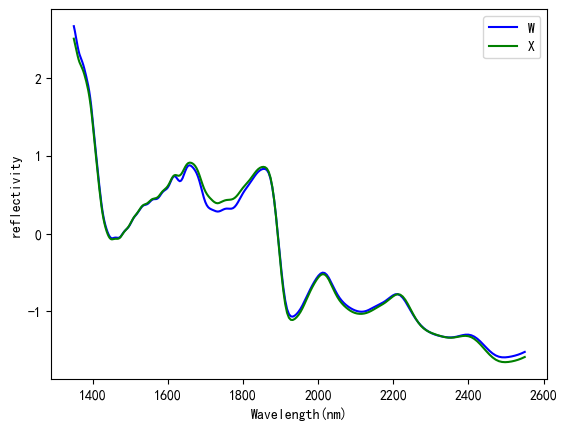

In [153]:
category,  split_datas = split_data(labels , reflectance_snv)
plot_duplicate_data(category,  split_datas , wavelength , type='mean') 



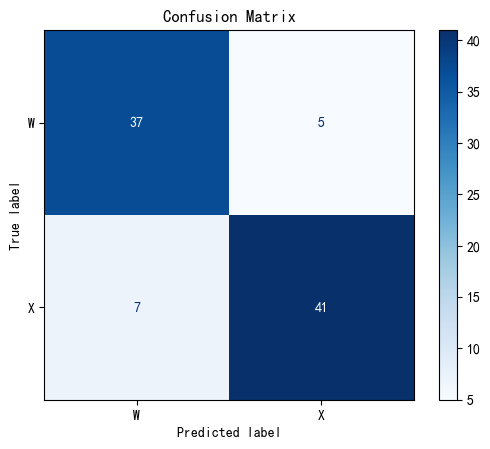

五折交叉验证的平均准确率: 0.87


In [188]:
def k_fold_cross_validation(X, y, model, n_splits=5):
    """
    使用五折交叉验证训练模型，并绘制混淆矩阵。
    
    参数:
    X : numpy array
        特征矩阵 (n_samples, n_features)
    y : numpy array or list
        标签对应的特征矩阵
    model : sklearn model
        要训练的机器学习模型
    n_splits : int
        交叉验证的折数，默认为5
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    Y_pred = []
    Y_test = []

    # 进行五折交叉验证
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # 训练模型
        model.fit(X_train, y_train)

        # 预测
        y_pred = model.predict(X_test)

        # 汇总结果
        Y_pred.extend(y_pred)
        Y_test.extend(y_test)

    # 计算混淆矩阵
    cm = confusion_matrix(Y_test, Y_pred)

    # 获取唯一的标签
    unique_labels = np.unique(y)

    # 绘制混淆矩阵
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # 计算并打印准确率
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"五折交叉验证的平均准确率: {accuracy:.2f}")



model = SVC(C=100, kernel='linear', gamma='auto')
k_fold_cross_validation(snv(spectrum), np.array(labels), model, n_splits=5)

### 年份区分数据读取

In [178]:
import pandas as pd 
import numpy as np
df = pd.read_csv(rf'I:\experiment_data\陈皮\0603-chenpi.csv')

wavelength = df.iloc[:, 4:-1].columns
wavelength = [10000000/float(x) for x in wavelength]
labels = [x.split('_')[0][0] for x in df.iloc[:, 0].values]
spectrum = df.iloc[:, 4:-1].values

### 筛选新会陈皮X与广西陈皮W
df2 = pd.DataFrame(spectrum)
df2.index = [x.split('_')[0] for x in df.iloc[:, 0].values]
df2_filtered = df2[df2.index.str.contains('X')]
labels = df2_filtered.index
labels = [x[1:] for x in labels]
spectrum = df2_filtered.values

留一交叉验证的平均准确率: 0.85


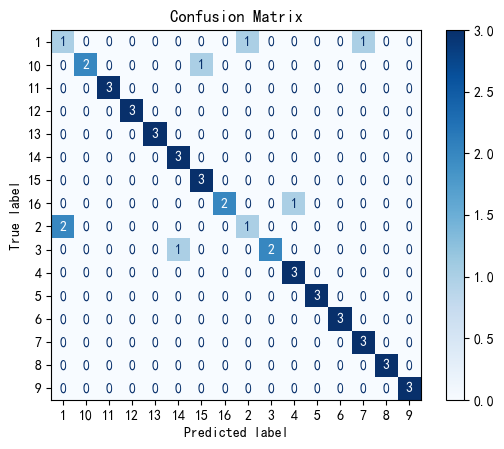

np.float64(0.8541666666666666)

In [180]:
importlib.reload(SpectrumAnalyse)
model = SVC(C=100, kernel='linear', gamma='auto')
leave_one_out_cross_validation(snv(spectrum), labels , model)

留一交叉验证的平均准确率: 0.85


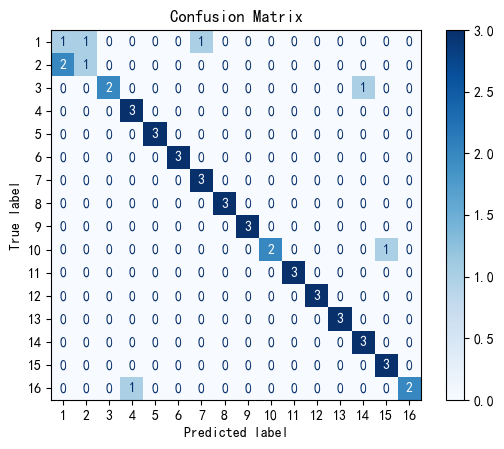

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def leave_one_out_cross_validation(X, y, model):
    """
    Perform Leave-One-Out Cross Validation (LOO CV) on the given dataset.
    
    Parameters:
    X : numpy array
        Feature matrix (n_samples, n_features)
    y : numpy array or list
        Labels corresponding to the feature matrix
    model : sklearn model
        A machine learning model (e.g., SVM) to train and predict
    
    Returns:
    float
        The mean accuracy of the model across all leave-one-out iterations
    """
    accuracies = []
    Y_pred = []
    Y_test = []
    
    # Perform Leave-One-Out Cross Validation
    for i in range(len(y)):
        # Split the data into train and test sets
        X_train, X_test = np.delete(X, i, axis=0), X[i, :]
        y_train, y_test = np.delete(y, i), y[i]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test.reshape(1, -1))
        
        # Store the predictions and true labels
        Y_pred.append(y_pred)
        Y_test.append(y_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)
    
    # Mean accuracy
    mean_accuracy = np.mean(accuracies)
    print(f"留一交叉验证的平均准确率: {mean_accuracy:.2f}")
    
    # Confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    
    # Get unique labels for plotting
    unique_labels = np.unique(y)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
    
    return mean_accuracy

# Example usage (assuming you have already defined your model and data):
# 假设 X 是特征数据，y 是标签数据
X = reflectance_snv  # 使用之前计算的反射率数据
y = labels  # 使用之前定义的标签
model = SVC(C=100, kernel='linear', gamma='auto')  # 定义SVM模型
mean_accuracy = leave_one_out_cross_validation(X, y, model)